# Fitting a Bond Yield Curve

Fitting a bond yield curve using the range of parametric functions provided

In [1]:
import datetime as dt
import pandas as pd
import numpy as np

In [2]:
from financepy.utils import *
from financepy.products.bonds import *


####################################################################
#    FINANCEPY Version 1.1 - This build: 27 Aug 2025 at 23:27      #
#     This software is distributed FREE AND WITHOUT ANY WARRANTY   #
#  Report bugs as issues at https://github.com/domokane/FinancePy  #
####################################################################



### Load up some Bond Data

In [3]:
# Move into the local folder of notebook
%pwd
%cd notebooks/products/bonds/
%pwd


[WinError 3] The system cannot find the path specified: 'notebooks/products/bonds/'
C:\Users\Dominic\Dropbox\Desktop\RESEARCH_DB\FinancePy\Code\financepy-git\notebooks\products\bonds


'C:\\Users\\Dominic\\Dropbox\\Desktop\\RESEARCH_DB\\FinancePy\\Code\\financepy-git\\notebooks\\products\\bonds'

In [4]:
bond_dataframe = pd.read_csv('./data/giltbondprices.txt', sep='\t')

In [5]:
# CALCULATE MID MARKET PRICES
bond_dataframe['mid'] = 0.5*(bond_dataframe['bid'] + bond_dataframe['ask'])

In [6]:
# SPECIFY UK BOND CONVENTIONS
freq_type = FrequencyTypes.SEMI_ANNUAL
dc_type = DayCountTypes.ACT_ACT_ICMA
settlement = Date(19, 9, 2012)

In [7]:
bonds = []
ylds = []

# LOAD BONDS AND CREATE A VECTOR OF FINBOND AND THEIR CORRESPONDING YIELDS

for index, bondData in bond_dataframe.iterrows():

    date_string = bondData['maturity']
    mat_dt_time = dt.datetime.strptime(date_string, '%d-%b-%y')
    maturity_dt = from_datetime(mat_dt_time)
    coupon = bondData['coupon']/100.0
    clean_price = bondData['mid']
    issue_dt = Date(maturity_dt.d, maturity_dt.m, 2000)
    bond = Bond(issue_dt, maturity_dt, coupon, freq_type, dc_type)
    yld = bond.yield_to_maturity(settlement, clean_price)
    bonds.append(bond)
    ylds.append(yld)

## Fitting the Yield Curves

### Cubic Polynomial

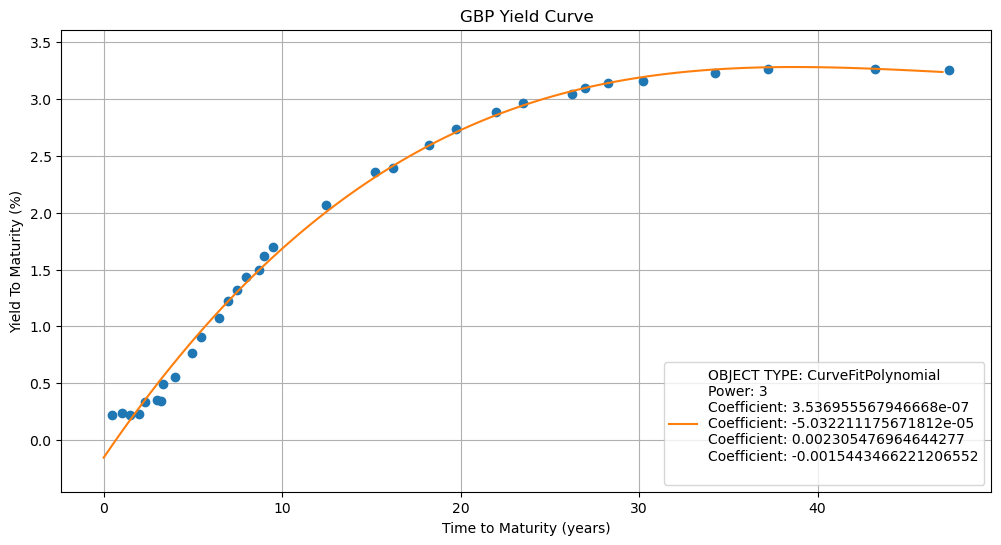

In [8]:
# FIT THE BOND YIELDS TO A CUBIC POLYNOMIAL
curve_fit_method = CurveFitPolynomial()
fitted_curve1 = BondYieldCurve(settlement, bonds, ylds, curve_fit_method)
fitted_curve1.plot("GBP Yield Curve")

See the cubic coefficients

In [9]:
print(fitted_curve1.curve_fit)

OBJECT TYPE: CurveFitPolynomial
Power: 3
Coefficient: 3.536955567946668e-07
Coefficient: -5.032211175671812e-05
Coefficient: 0.002305476964644277
Coefficient: -0.0015443466221206552



### Quintic Polynomial

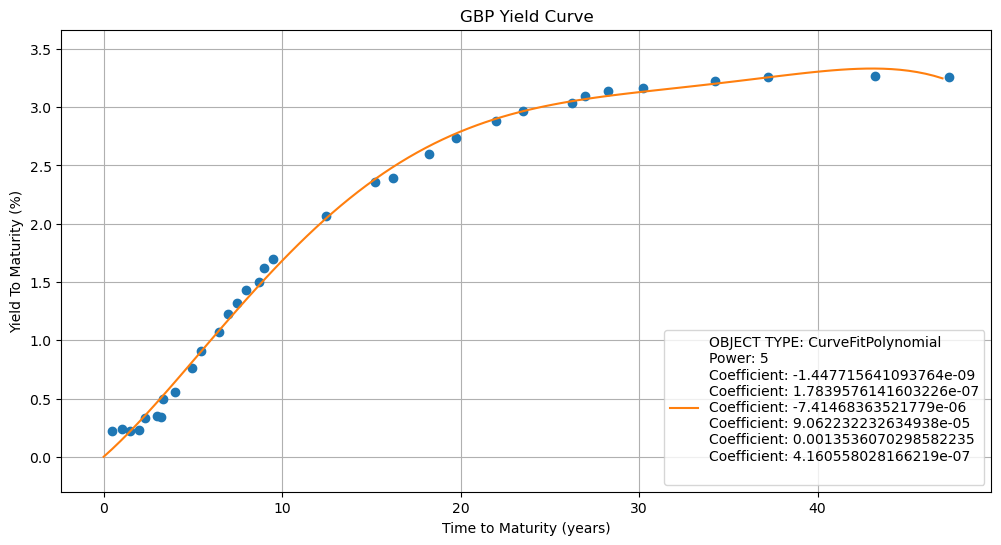

In [10]:
# FIT THE BOND YIELDS TO A QUINTIC POLYNOMIAL
curve_fit_method = CurveFitPolynomial(5)
fitted_curve2 = BondYieldCurve(settlement, bonds, ylds, curve_fit_method)
fitted_curve2.plot("GBP Yield Curve")

See the quintic coefficients

In [11]:
print(fitted_curve2.curve_fit)

OBJECT TYPE: CurveFitPolynomial
Power: 5
Coefficient: -1.447715641093764e-09
Coefficient: 1.7839576141603226e-07
Coefficient: -7.41468363521779e-06
Coefficient: 9.062232232634938e-05
Coefficient: 0.0013536070298582235
Coefficient: 4.160558028166219e-07



### Nelson-Siegel Curve

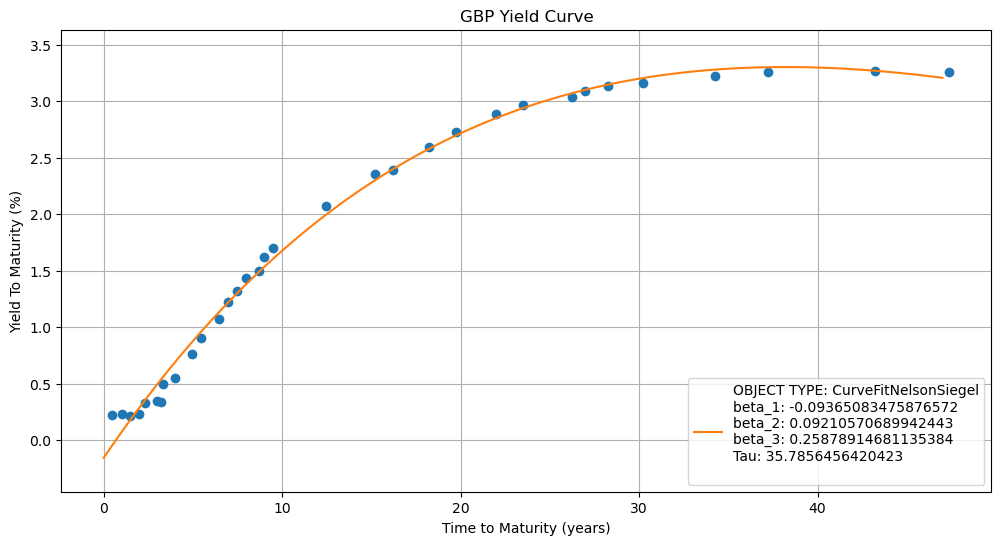

In [12]:
# FIT THE BONDS TO A NELSON-SIEGEL CURVE
curve_fit_method = CurveFitNelsonSiegel()
fitted_curve3 = BondYieldCurve(settlement, bonds, ylds, curve_fit_method)
fitted_curve3.plot("GBP Yield Curve")

In [13]:
print(fitted_curve3.curve_fit)

OBJECT TYPE: CurveFitNelsonSiegel
beta_1: -0.09365083475876572
beta_2: 0.09210570689942443
beta_3: 0.25878914681135384
Tau: 35.7856456420423



### Nelson-Siegel Svensson Curve

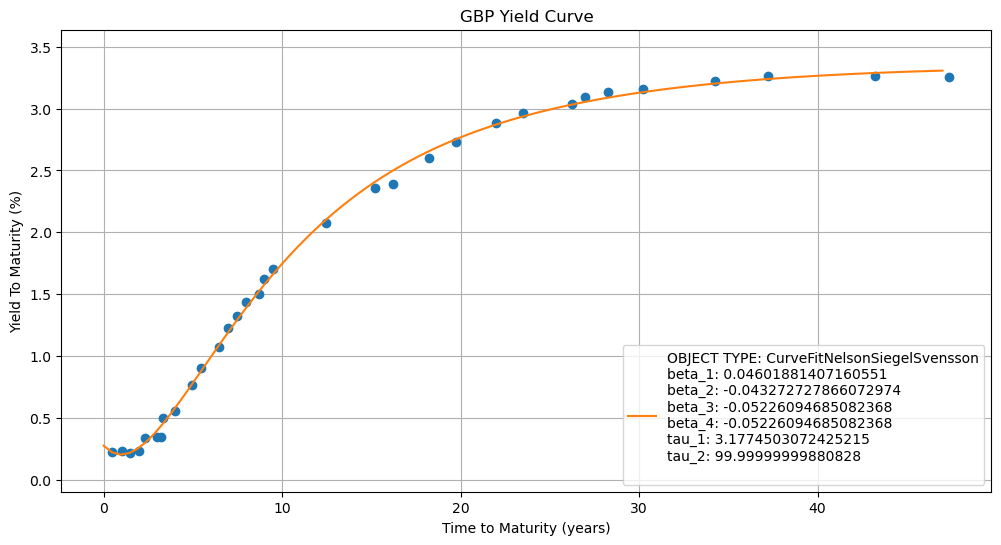

In [14]:
# FIT THE BONDS TO A NELSON-SIEGEL-SVENSSON CURVE
curve_fit_method = CurveFitNelsonSiegelSvensson()
fitted_curve4 = BondYieldCurve(settlement, bonds, ylds, curve_fit_method)
fitted_curve4.plot("GBP Yield Curve")

In [15]:
print(fitted_curve4.curve_fit)

OBJECT TYPE: CurveFitNelsonSiegelSvensson
beta_1: 0.04601881407160551
beta_2: -0.043272727866072974
beta_3: -0.05226094685082368
beta_4: -0.05226094685082368
tau_1: 3.1774503072425215
tau_2: 99.99999999880828



### B-Spline Curve

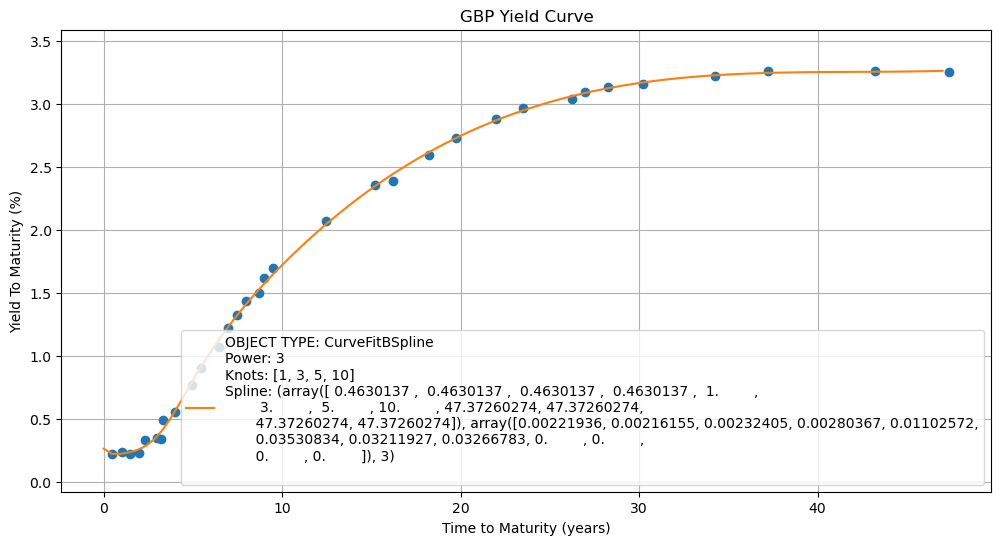

In [16]:
# FIT THE BONDS TO A B-SPLINE CURVE
curve_fit_method = CurveFitBSpline()
fitted_curve5 = BondYieldCurve(settlement, bonds, ylds, curve_fit_method)
fitted_curve5.plot("GBP Yield Curve")

In [17]:
print(fitted_curve5.curve_fit)

OBJECT TYPE: CurveFitBSpline
Power: 3
Knots: [1, 3, 5, 10]
Spline: (array([ 0.4630137 ,  0.4630137 ,  0.4630137 ,  0.4630137 ,  1.        ,
        3.        ,  5.        , 10.        , 47.37260274, 47.37260274,
       47.37260274, 47.37260274]), array([0.00221936, 0.00216155, 0.00232405, 0.00280367, 0.01102572,
       0.03530834, 0.03211927, 0.03266783, 0.        , 0.        ,
       0.        , 0.        ]), 3)



## Accessing the Curve

You can access a yield from a date as follows

In [18]:
# EXTRACT A YIELD FROM A FITTED YIELD CURVE
maturity_dt = Date(19, 9, 2030)
interp_yield = fitted_curve5.interp_yield(maturity_dt)
print(maturity_dt, interp_yield*100)

19-SEP-2030 2.6018582282125005


## Vectorisations

You can also access the curve using a time and this can be vectorised.

In [19]:
times = np.linspace(0,10,100)

In [20]:
interp_yields = fitted_curve5.interp_yield(times)

In [21]:
interp_yields*100

array([0.26306558, 0.24888058, 0.23790522, 0.22979017, 0.22418607,
       0.2207436 , 0.21911342, 0.21894618, 0.21989255, 0.22160318,
       0.22372881, 0.22601011, 0.22845504, 0.23112095, 0.23406523,
       0.23734522, 0.24101831, 0.24514185, 0.24977322, 0.25496977,
       0.26078888, 0.26728791, 0.27452422, 0.28255519, 0.29143818,
       0.30123056, 0.31198969, 0.32377294, 0.33663767, 0.35064125,
       0.36584044, 0.38224465, 0.39978302, 0.41837693, 0.43794775,
       0.45841688, 0.47970567, 0.50173552, 0.52442779, 0.54770386,
       0.57148512, 0.59569293, 0.62024868, 0.64507374, 0.67008949,
       0.6952173 , 0.72037855, 0.74549463, 0.7704869 , 0.79527675,
       0.81978728, 0.84398151, 0.86786236, 0.89143449, 0.91470256,
       0.9376712 , 0.9603451 , 0.98272888, 1.00482722, 1.02664477,
       1.04818617, 1.0694561 , 1.0904592 , 1.11120012, 1.13168352,
       1.15191407, 1.1718964 , 1.19163518, 1.21113506, 1.2304007 ,
       1.24943676, 1.26824788, 1.28683872, 1.30521394, 1.32337

Copyright (c) 2020 Dominic O'Kane